In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

Data fields <br>
attr1 - net profit / total assets <br>
attr2 - total liabilities / total assets<br>
attr3 - working capital / total assets<br>
attr4 - current assets / short-term liabilities<br>
attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365<br>
attr6 - retained earnings / total assets<br>
attr7 - EBIT / total assets<br>
attr8 - book value of equity / total liabilities<br>
attr9 - sales / total assets<br>
attr10 - equity / total assets<br>
attr11 - (gross profit + extraordinary items + financial expenses) / total assets<br>
attr12 - gross profit / short-term liabilities<br>
attr13 - (gross profit + depreciation) / sales<br>
attr14 - (gross profit + interest) / total assets<br>
attr15 - (total liabilities * 365) / (gross profit + depreciation)<br>
attr16 - (gross profit + depreciation) / total liabilities<br>
attr17 - total assets / total liabilities<br>
attr18 - gross profit / total assets<br>
attr19 - gross profit / sales<br>
attr20 - (inventory * 365) / sales<br>
attr21 - sales (n) / sales (n-1)<br>
attr22 - profit on operating activities / total assets<br>
attr23 - net profit / sales<br>
attr24 - gross profit (in 3 years) / total assets<br>
attr25 - (equity - share capital) / total assets<br>
attr26 - (net profit + depreciation) / total liabilities<br>
attr27 - profit on operating activities / financial expenses<br>
attr28 - working capital / fixed assets<br>
attr29 - logarithm of total assets<br>
attr30 - (total liabilities - cash) / sales<br>
attr31 - (gross profit + interest) / sales<br>
attr32 - (current liabilities * 365) / cost of products sold<br>
attr33 - operating expenses / short-term liabilities<br>
attr34 - operating expenses / total liabilities<br>
attr35 - profit on sales / total assets<br>
attr36 - total sales / total assets<br>
attr37 - (current assets - inventories) / long-term liabilities<br>
attr38 - constant capital / total assets<br>
attr39 - profit on sales / sales<br>
attr40 - (current assets - inventory - receivables) / short-term liabilities<br>
attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))<br>
attr42 - profit on operating activities / sales<br>
attr43 - rotation receivables + inventory turnover in days<br>
attr44 - (receivables * 365) / sales<br>
attr45 - net profit / inventory<br>
attr46 - (current assets - inventory) / short-term liabilities<br>
attr47 - (inventory * 365) / cost of products sold<br>
attr48 - EBITDA (profit on operating activities - depreciation) / total assets<br>
attr49 - EBITDA (profit on operating activities - depreciation) / sales<br>
attr50 - current assets / total liabilities<br>
attr51 - short-term liabilities / total assets<br>
attr52 - (short-term liabilities * 365) / cost of products sold)<br>
attr53 - equity / fixed assets<br>
attr54 - constant capital / fixed assets<br>
attr55 - working capital<br>
attr56 - (sales - cost of products sold) / sales<br>
attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)<br>
attr58 - total costs /total sales<br>
attr59 - long-term liabilities / equity<br>
attr60 - sales / inventory<br>
attr61 - sales / receivables<br>
attr62 - (short-term liabilities *365) / sales<br>
attr63 - sales / short-term liabilities <br>
attr64 - sales / fixed assets<br>
class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt<br>


Ссылка на kaggle и ML repository:

https://www.kaggle.com/competitions/companies-bankruptcy-forecast/data?select=bankruptcy_sample_Y.csv

https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data


In [42]:
data = arff.loadarff('3year.arff')
df = pd.DataFrame(data[0])

In [47]:
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,b'1'
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,b'1'
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,b'1'
10501,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,b'1'


In [53]:
df['class'].value_counts() #сколько банкротилось из 10к

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [70]:
df.loc[df["class"] == df["class"][0], "class"] = 0  #заменяем на 0 или 1
df.loc[df["class"] == df["class"][10502], "class"] = 1

In [75]:
df['class'].value_counts() 

0    10008
1      495
Name: class, dtype: int64

In [81]:
df['class'].mean()*100 #столько % обанкротившихся компаний

4.712939160239932

In [103]:
GDP_def = 84.4365 #ср знач дефлятора за 2000 - 2013 рассчитано в файле эксель
df['SIZE'] = np.log(df['Attr29']) - np.log(GDP_def)

C:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
descriptive_df1 = df.describe()[['Attr1', 'Attr3', 'SIZE', 'Attr46', 'Attr9', 'Attr6', 'Attr48']].rename(columns={'Attr1': 'ROA',
                                                                                                  'Attr3': 'WCTA',                                                                                     
                                                                                                  'Attr46': 'CR',
                                                                                                  'Attr9': 'SALETA',
                                                                                                  'Attr6': 'RETA',
                                                                                                  'Attr48': 'EBITTA'                                                                                   
                                                                                                 })

In [113]:
descriptive_df1

,ROA,WCTA,SIZE,CR,SALETA,RETA,EBITTA
count,10503.000000,10503.000000,10500.000000,10485.000000,10500.000000,10503.000000,10503.000000
mean,0.052844,0.095490,-3.094601,8.978029,1.819254,-0.121159,0.004834
std,0.647797,6.420056,0.235397,523.565601,7.581659,6.970625,0.629770
min,-17.692000,-479.730000,-7.315871,-6.469200,-1.215700,-508.120000,-17.692000
25%,0.000686,0.017461,-3.214079,0.602830,1.011275,0.000000,-0.048988
50%,0.043034,0.198560,-3.066724,1.060600,1.199000,0.000000,0.009653
75%,0.123805,0.419545,-2.943084,2.042600,2.059100,0.072584,0.100710
max,52.652000,17.708000,-2.172166,53433.000000,740.440000,45.533000,47.597000


In [123]:
df_corr = df[['Attr1', 'Attr3', 'SIZE', 'Attr46', 'Attr9', 'class']].rename(columns={'Attr1': 'ROA',
                                                                'Attr3': 'WCTA',                                                                                     
                                                                'Attr46': 'CR',
                                                                'Attr9': 'SALETA'})

In [128]:
df_corr

,ROA,WCTA,SIZE,CR,SALETA,class
0,0.174190,0.143710,-2.653062,0.90221,1.19610,0
1,0.146240,0.282300,-3.030099,1.03300,1.60180,0
2,0.000595,0.488390,-2.905172,2.32900,1.00770,0
3,0.024526,0.275460,-2.986731,0.90954,1.05090,0
4,0.188290,0.342310,-2.909226,0.52685,1.33930,0
...,...,...,...,...,...,...
10498,0.002861,-0.223860,-2.980716,0.28983,1.01200,1
10499,-0.051968,0.147150,-2.834151,1.40110,0.94694,1
10500,-0.135900,-0.342010,-3.026819,0.28790,1.09990,1
10501,0.009423,0.261630,-3.046810,0.90036,1.01230,1


In [129]:
df_corr.corr()

,ROA,WCTA,SIZE,CR,SALETA
ROA,1.000000,-0.271895,0.012935,0.001245,-0.055770
WCTA,-0.271895,1.000000,0.083148,0.001975,-0.004825
SIZE,0.012935,0.083148,1.000000,-0.020966,-0.071026
CR,0.001245,0.001975,-0.020966,1.000000,-0.002763
SALETA,-0.055770,-0.004825,-0.071026,-0.002763,1.000000


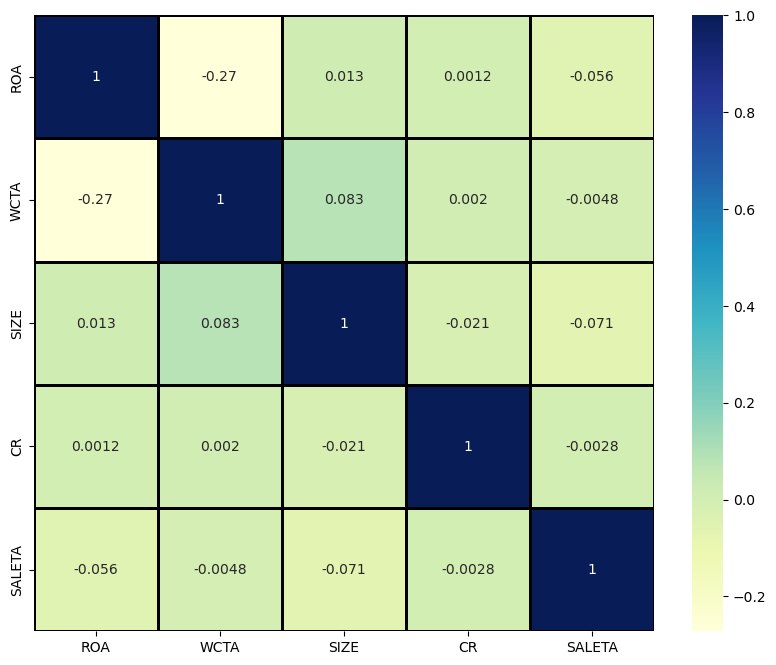

In [130]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    df_corr.corr(),
    annot=True, #подписываем цифры в ячейках
#     fmt='.0f', #округление цифр до нулевого знака
    linewidths=1, 
    linecolor='black', 
    cmap="YlGnBu"
);

In [82]:
df.isna().sum() #пропуски

Attr1       0
Attr2       0
Attr3       0
Attr4      18
Attr5      25
         ... 
Attr61     17
Attr62     43
Attr63     18
Attr64    228
class       0
Length: 65, dtype: int64

In [90]:
df.isna().sum().sum()

9888

Дефлятор ВВП Польши:

ГЛАВНЫЙ https://svspb.net/danmark/vvp-defljator.php

https://take-profit.org/statistics/gdp-deflator/poland/

https://tradingeconomics.com/poland/gdp-deflator#:~:text=GDP%20Deflator%20in%20Poland%20averaged,the%20first%20quarter%20of%201995.

Про robust

https://stackoverflow.com/questions/61171429/change-covariance-type-to-robust-in-statsmodels-logit

https://analyticsindiamag.com/how-to-build-a-robust-logistic-regression-model-with-l2-regularization/

Про Эндогенность:

https://stats.stackexchange.com/questions/171479/difference-endogeneity-and-multicollinearity-in-logistic-regression

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.stata.com/meeting/sandiego12/materials/sd12_baum.pdf

In [132]:
df_corr.describe()

,ROA,WCTA,SIZE,CR,SALETA
count,10503.000000,10503.000000,10500.000000,10485.000000,10500.000000
mean,0.052844,0.095490,-3.094601,8.978029,1.819254
std,0.647797,6.420056,0.235397,523.565601,7.581659
min,-17.692000,-479.730000,-7.315871,-6.469200,-1.215700
25%,0.000686,0.017461,-3.214079,0.602830,1.011275
50%,0.043034,0.198560,-3.066724,1.060600,1.199000
75%,0.123805,0.419545,-2.943084,2.042600,2.059100
max,52.652000,17.708000,-2.172166,53433.000000,740.440000
